# DATA 622 HW2 EDA

#### Author: Marco Siqueira Campos

Objetive: Exploratory Data Analysis for Titanic dataset modeling.  
The model response will be "*Survived*".

Load packages:

In [1]:
# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Read the file:

In [2]:
df_train = pd.read_csv('train.csv', sep=',')

Check the file

In [3]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Explore the dataset:

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The following analyzes can be performed:  
We have missings in *Age*, *Cabin* and *Embarked*.  
*Cabin* has a lot of missing values, we have only 23% of valid values, this will be withdraw..   
The *Ticket* and *PassengerId* they do not have relevant information and will be withdraw.

Let's analyse the *Pclass*

In [5]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

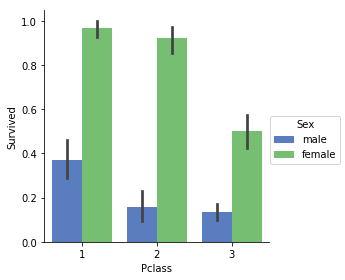

In [6]:
sns.factorplot('Pclass', 'Survived', 'Sex', data=df_train, kind="bar", palette="muted", legend=True)

It is clear that class and gender influence the probability of survival.  
Being in first class and being a woman influences the survival rate.  
Here there is a opportunity to change this variables in a dummy way, there is a advantage in moddeling, with this is possible to weight or switch variables to on or off, improving the model.

Let's analyse the *Name*

In [7]:
df_train['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

The *Names* do not have much relevance, but the titles may be important in the survival rate.  
Six new categories based on the title will be created and the *Names* will be withdrawn:  
Mr, Miss, Mrs, Master, Army and Rare.
Army (Capt, Col and Major) and Rare (Lady, Countless, Don, Dr, Rev, Sir, Jonkheer and Dona)  
Mr=1, Miss=2, Mrs=3, Master=4, Army=5 and Rare=6. 

In [8]:
data = [df_train]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4,"Army": 5,"Rare": 6}
for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
     # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Don', 'Dr',\
                                                'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Major'], 'Army')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
# This code was adapted from reference 1 

In [9]:
# Drop column Name
df_train=df_train.drop(columns=['Name'])

Now we will need check how the *Title* is related to the survive.

Text(0.5,1,'Survived by Title')

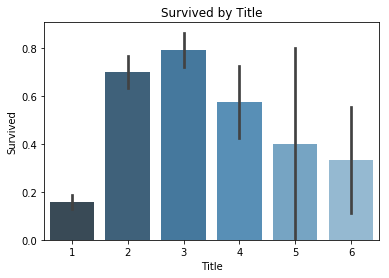

In [10]:
sns.barplot(x='Title', y='Survived', palette='Blues_d', data=df_train).set_title('Survived by Title')

There is relationship between *Title* and *Survive*.
Title 1, *Mr*, have lower probability to survive, and title 3,"Master" have high chance to survive.

Let's analyse the Sex

In [11]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5,1,'Survived by Sex')

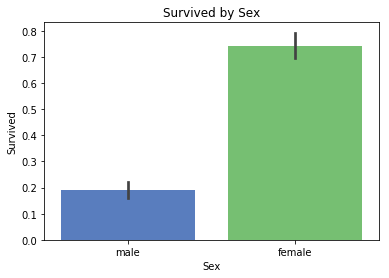

In [12]:
sns.barplot(x='Sex', y='Survived', data=df_train, palette="muted").set_title('Survived by Sex')

It is quite evident that women were more likely to survive.

Let's analyse the *Age*

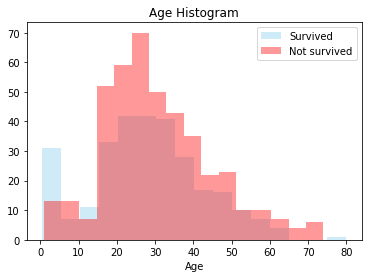

In [13]:
df_train_w=df_train.dropna(subset=['Age'])
sns.distplot( df_train_w.loc[df_train_w['Survived']==1,'Age'], color="skyblue", label="Survived",kde =False)
sns.distplot( df_train_w.loc[df_train_w['Survived']==0,'Age'], color="red", label="Not survived",kde =False).set_title("Age Histogram")
plt.legend()



Is possible to see some relationship, bellow 15, children and teenagers, have more chance to survive. On the other hand, people in the 15 to 40 range are more likely to not survive.

Let's analyse the *SibSp*

In [14]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Check relationship with survived.

Text(0.5,1,'Survived by Siblings')

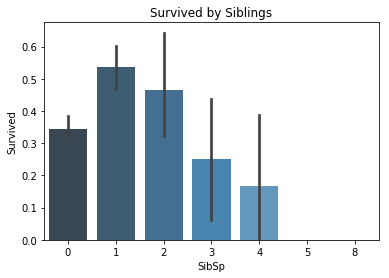

In [15]:
sns.barplot(x='SibSp', y='Survived', palette='Blues_d', data=df_train).set_title('Survived by Siblings')

There is relationship in a non linear way, there is a peak at siblings=1 and goes down with more and less siblings.

Let's analyse the *Parch*.

In [16]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5,1,'Survived by Parch')

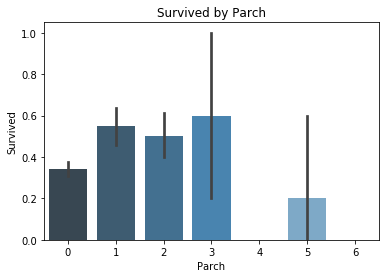

In [17]:
sns.barplot(x='Parch', y='Survived', palette='Blues_d', data=df_train).set_title('Survived by Parch')

Here the results is not so clear beacuse the low quantity in some categories, but there seems to be some kind of relationship, this variable will be kept in the model.

Let's analyse the *Fare*.

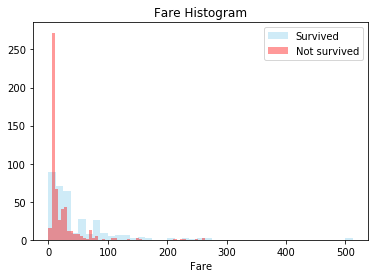

In [18]:
sns.distplot( df_train.loc[df_train['Survived']==1,'Fare'], color="skyblue", label="Survived",kde =False)
sns.distplot( df_train.loc[df_train['Survived']==0,'Fare'], color="red", label="Not survived",kde =False).set_title("Fare Histogram")
plt.legend()


Text(0.5,1,'Fare Boxplot')

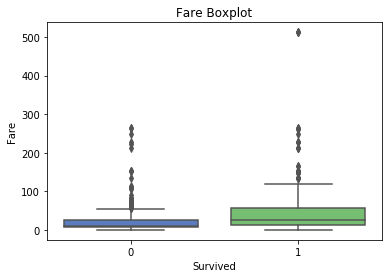

In [19]:
sns.boxplot( x='Survived', y='Fare', data=df_train, palette="muted").set_title("Fare Boxplot")


Is possible to see several patterns, threre is relationship, higher fare increase the chance to survive. There is one special outlier in survived group, near 500.I would belived that this value is true, I will kept in the dataset. 

Let's analyse the *Embarked*.

In [20]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Text(0.5,1,'Survived by Embarked')

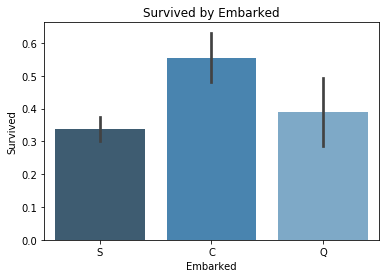

In [21]:
sns.barplot(x='Embarked', y='Survived', palette='Blues_d', data=df_train).set_title('Survived by Embarked')

We have three origins, S=Southampton, C=Cherbourg and Q=Queenstown. The passengers from Cherbourg have more chance to survive.  
Here we have two missings will be filled with the most frequent values, in this case S.  
We have another good chance to change this variable in dummy variable, will be done.  

In conclusion:  

The follows variables will be withdraw:    
    *Cabin*, *PassengerId*  and *Ticket*.  
All other variables will be maintained because they have a relationship with survival.  

The follow missing from the variables will be solved:  
    *Age* will be filled with median.  
    *Embarked* will be filled with the most frequent, S.
    
The variables from *Embaked* and *Pclass* will be changed by dummy variable.

The variable *Name* will be changed for a six categorical variable related from the title name. The new categories will be: Mr=1, Miss=2, Mrs=3, Master=4, Army=5 and Rare=6.    


References:  
1    [towardsdatascience.com/predicting-the-survival-of-titanic-passengers](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)  
2    [Python Seaborn Tutorial For Beginners](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=278443377077&utm_targetid=aud-299261629574:dsa-473406580275&utm_loc_interest_ms=&utm_loc_physical_ms=1001686&gclid=EAIaIQobChMI1JKgv_K43QIVkgqRCh2GowWOEAAYASAAEgLV5fD_BwE)